In [47]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import pandas as pd
from pandas import DataFrame
from typing import List

In [62]:
df = pd.read_csv("dataset_encoded_features.csv")

In [63]:
def plot_cluster_data_two_features(X: DataFrame, col1: str, col2: str, range_n_clusters: List[int]):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)
    
        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X[col1], X[col2], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )
    
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
            centers[:, 0],
            centers[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )
    
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")
    
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel(f"Feature space for the {col1} feature")
        ax2.set_ylabel(f"Feature space for the {col2} feature")
    
        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )
    
    plt.show()

### drives_per_driving_day VS km_per_driving_day
ожидание: мб будут кластеры типа мало км в день + много поездок (типа курьеры, такси) и мало поездок в денб, но большой километраж (не найдено)

For n_clusters = 2 The average silhouette_score is : 0.8498225657378791
For n_clusters = 3 The average silhouette_score is : 0.7795509326073505
For n_clusters = 4 The average silhouette_score is : 0.7340190491372665
For n_clusters = 5 The average silhouette_score is : 0.6907663814008723


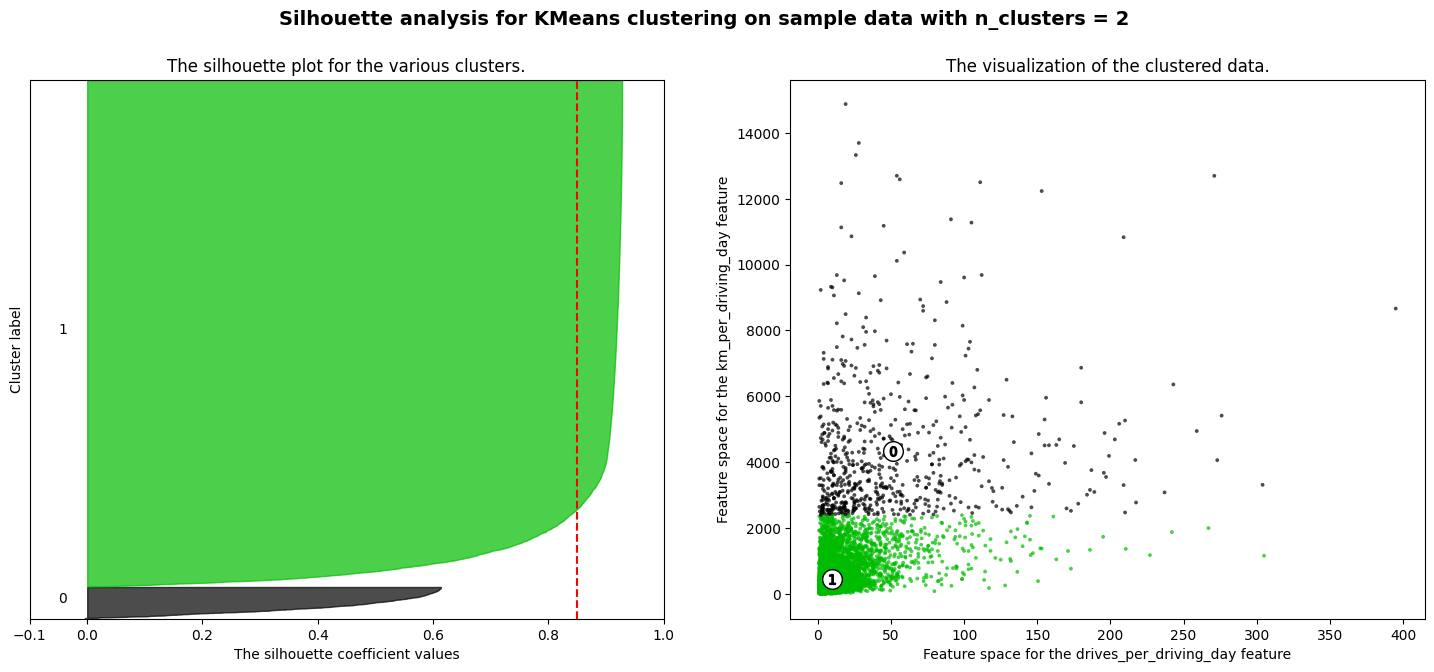

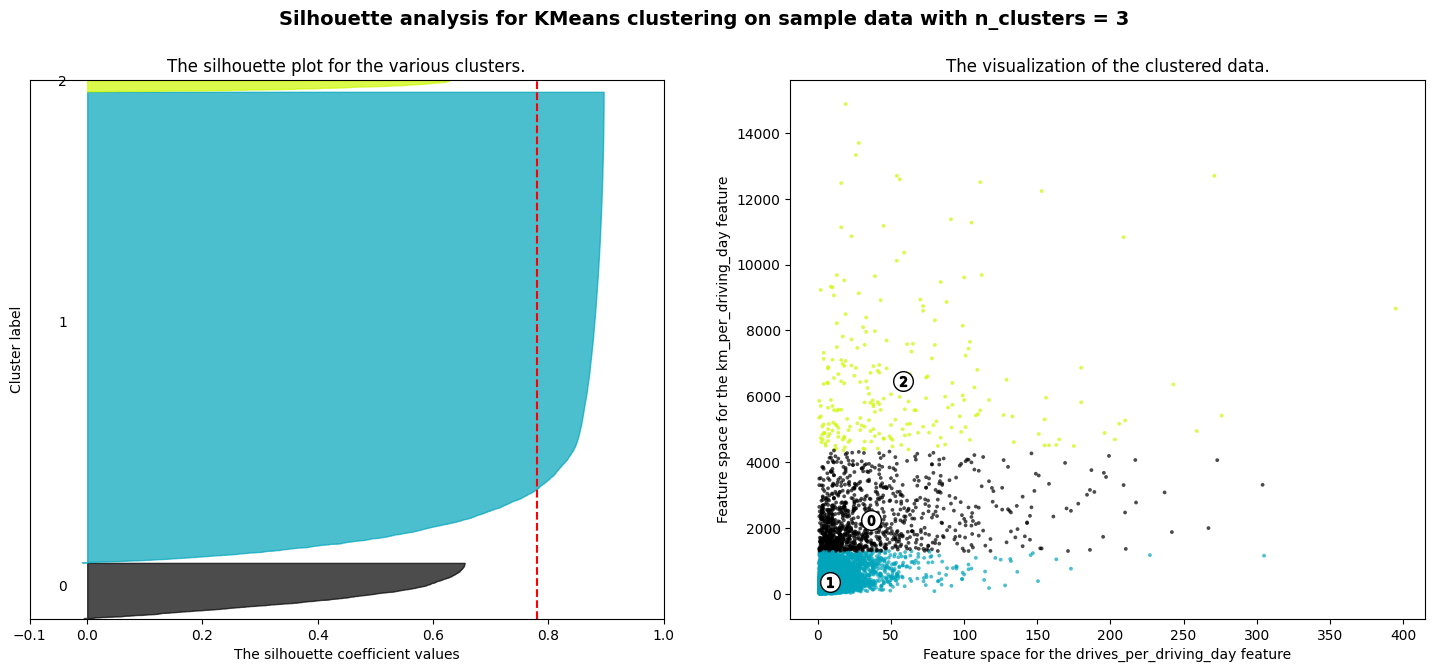

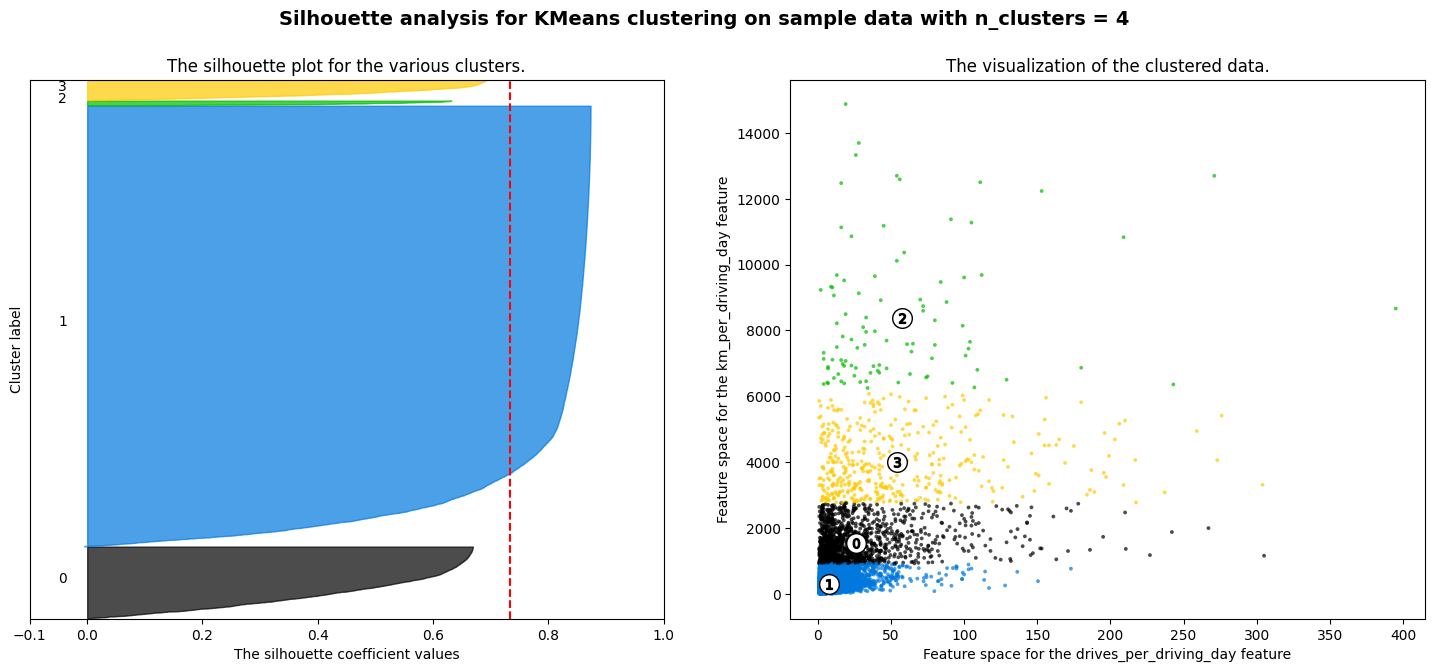

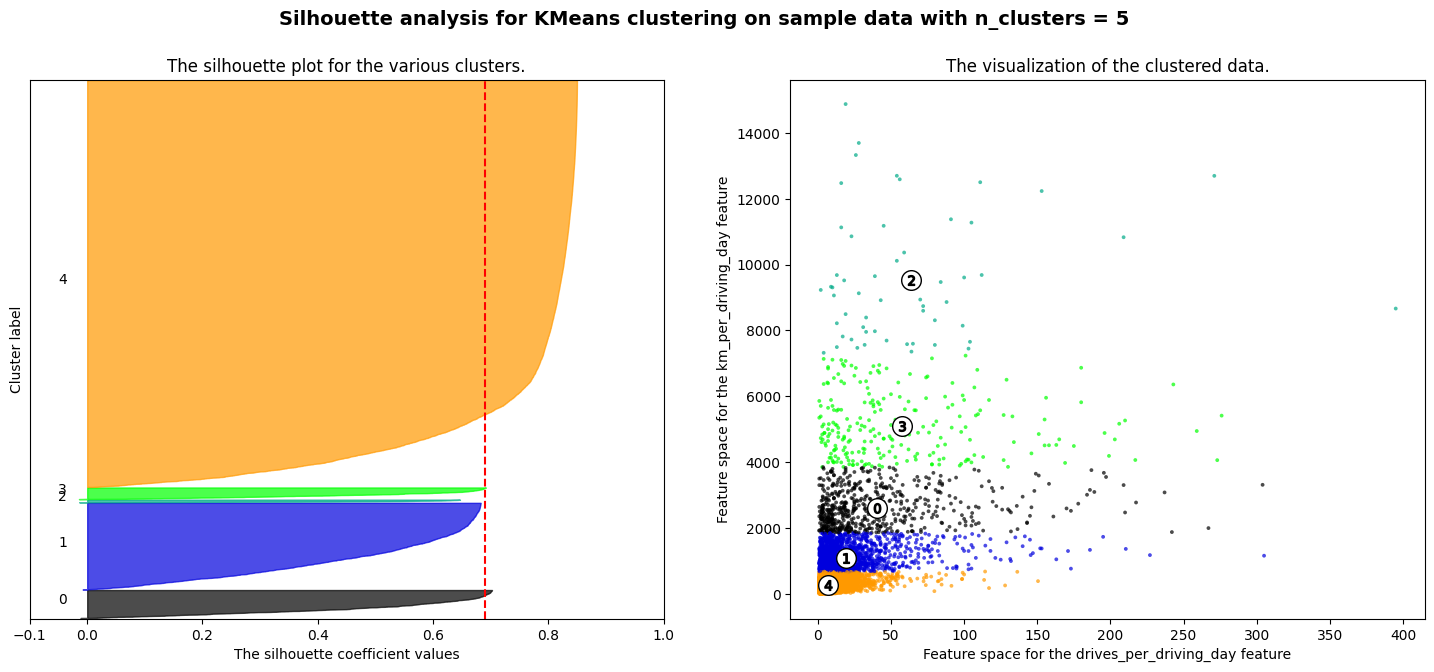

In [64]:
col1 = "drives_per_driving_day"
col2 = "km_per_driving_day"
x = df[[col1, col2]]
n_clusters = [2, 3, 4, 5]
plot_cluster_data_two_features(x, col1, col2, n_clusters)

In [65]:
df1 = df.copy()

In [66]:
df1.drop(df1[df1["drives_per_driving_day"] > 60].index, inplace=True)

In [67]:
df1.drop(df1[df1["km_per_driving_day"] > 1299].index, inplace=True)

In [68]:
df1.describe()

,Unnamed: 0.1,Unnamed: 0,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,drives_per_driving_day,km_per_drive,is_churned,device_code
count,9495.000000,9495.000000,9495.000000,9495.000000,9495.00000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000,9495.000000
mean,5452.050026,7483.198210,7483.198210,96.932385,80.70574,206.735188,1752.021696,124.363876,29.975987,3813.784147,1771.405122,17.351553,13.823381,357.980814,7.573991,83.443247,0.147025,0.359347
std,3152.355338,4333.076801,4333.076801,79.430156,64.73643,135.843736,1009.228027,150.505319,45.528117,2329.268868,1356.654755,7.811089,6.667214,275.840375,8.073833,94.956657,0.354149,0.479834
min,0.000000,0.000000,0.000000,2.000000,2.00000,8.609676,6.000000,0.000000,0.000000,60.441250,18.282082,1.000000,1.000000,3.022063,1.000000,1.008775,0.000000,0.000000
25%,2727.500000,3730.000000,3730.000000,41.000000,35.00000,107.251620,875.000000,11.000000,0.000000,2132.213880,810.561129,11.000000,8.000000,154.203496,2.615385,26.600937,0.000000,0.000000
50%,5433.000000,7469.000000,7469.000000,73.000000,61.00000,175.718939,1750.000000,73.000000,9.000000,3321.175255,1428.213502,17.000000,14.000000,274.486946,4.814815,52.798821,0.000000,0.000000
75%,8189.500000,11247.500000,11247.500000,128.000000,106.00000,269.801829,2627.500000,182.000000,44.000000,4959.505543,2356.533626,24.000000,19.000000,479.875519,9.166667,103.139181,0.000000,1.000000
max,10924.000000,14998.000000,14998.000000,693.000000,563.00000,1216.154633,3500.000000,1236.000000,415.000000,20108.364120,15851.727160,31.000000,30.000000,1298.482565,60.000000,1242.665628,1.000000,1.000000


In [61]:
df1[df1["km_per_drive"] > 1000]

,Unnamed: 0.1,Unnamed: 0,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,drives_per_driving_day,km_per_drive,is_churned,device_code
161,161,200,200,5,5,138.870575,321,0,0,8809.226415,2667.907883,3,0,0.000000,0.000000,1761.845283,1,1
231,231,281,281,2,2,68.434550,3150,0,60,3837.590980,2842.697652,1,0,0.000000,0.000000,1918.795490,1,0
349,349,435,435,3,3,334.223848,1525,0,42,7896.638283,5860.949843,3,0,0.000000,0.000000,2632.212761,0,1
667,667,843,843,7,6,86.501367,450,88,25,10291.168450,1358.516684,0,0,0.000000,0.000000,1715.194742,0,0
1164,1164,1461,1461,4,4,6.109505,89,239,52,5828.848546,2229.161647,3,0,0.000000,0.000000,1457.212137,1,0
1354,1354,1689,1689,1,1,99.139091,927,102,16,4178.532250,2623.954139,0,0,0.000000,0.000000,4178.532250,1,0
1757,1757,2204,2204,5,5,101.560545,324,59,1,6501.843196,3938.435953,0,0,0.000000,0.000000,1300.368639,0,0
1891,1891,2385,2385,2,2,50.303506,1471,9,0,5586.621317,1225.543080,2,0,0.000000,0.000000,2793.310659,0,1
2337,2337,2955,2955,21,17,82.855093,75,21,15,20108.364120,15851.727160,21,17,1182.844948,1.000000,1182.844948,0,0
2923,2923,3686,3686,3,3,13.533853,49,109,0,6451.537163,307.750679,1,0,0.000000,0.000000,2150.512388,0,1


For n_clusters = 2 The average silhouette_score is : 0.6685433999560909
For n_clusters = 3 The average silhouette_score is : 0.6036417216335248
For n_clusters = 4 The average silhouette_score is : 0.5727060780331596
For n_clusters = 5 The average silhouette_score is : 0.5493874334826953


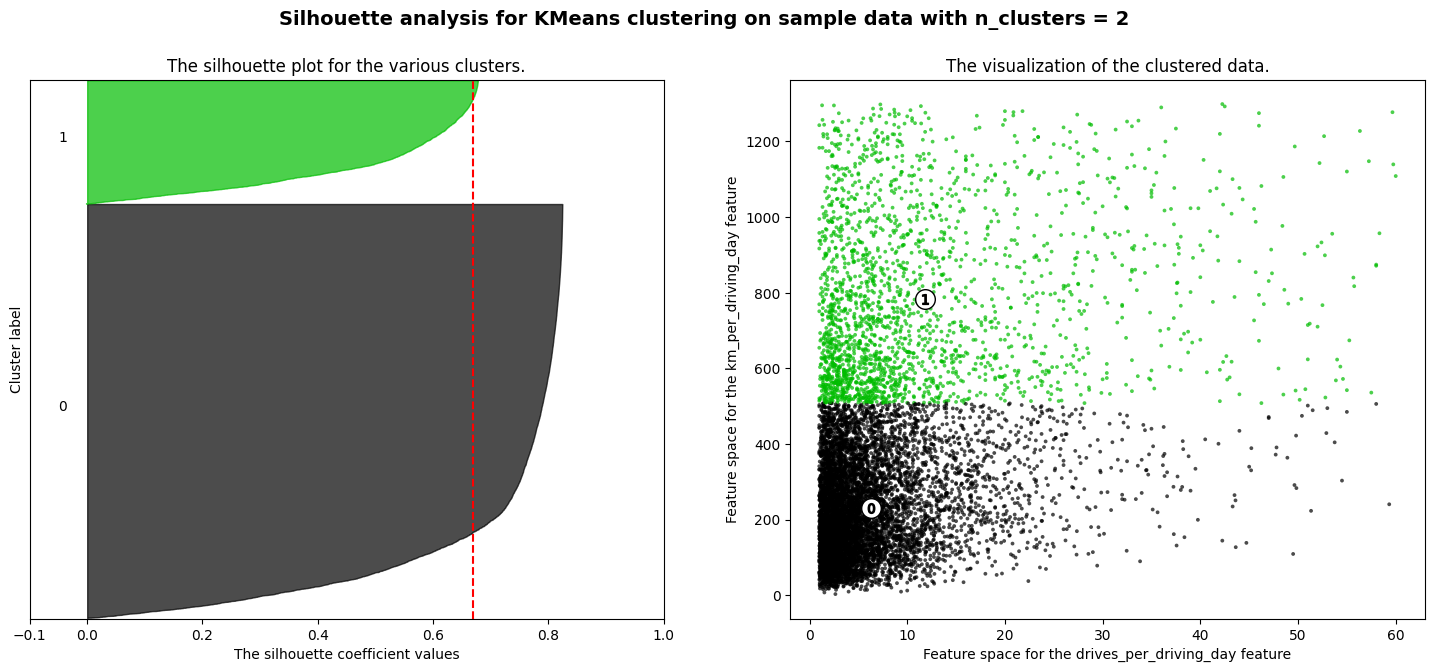

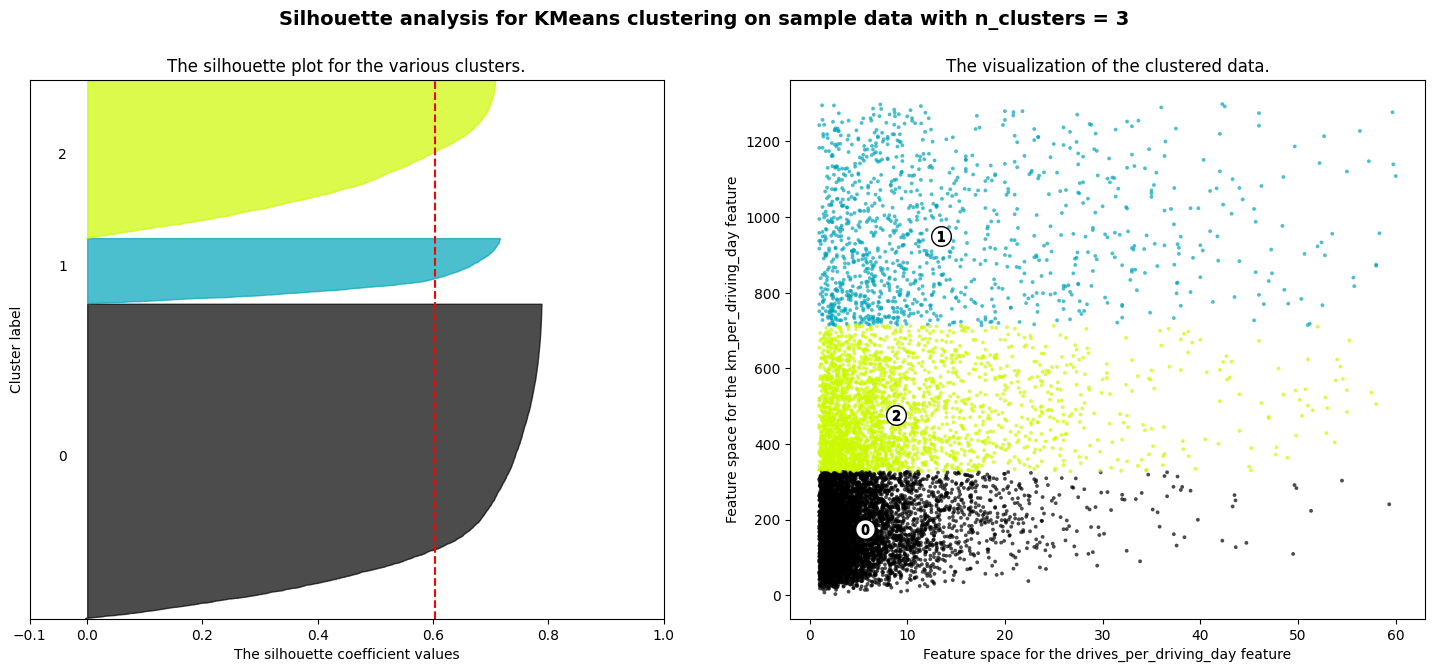

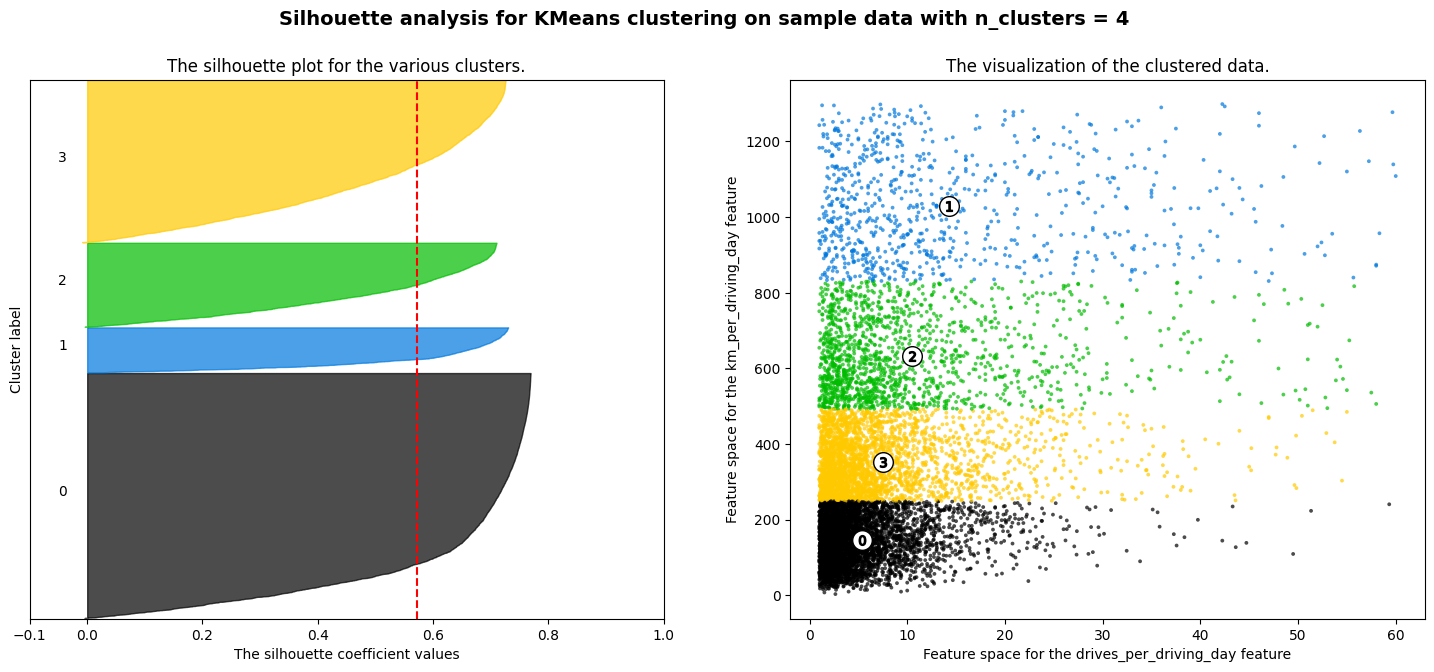

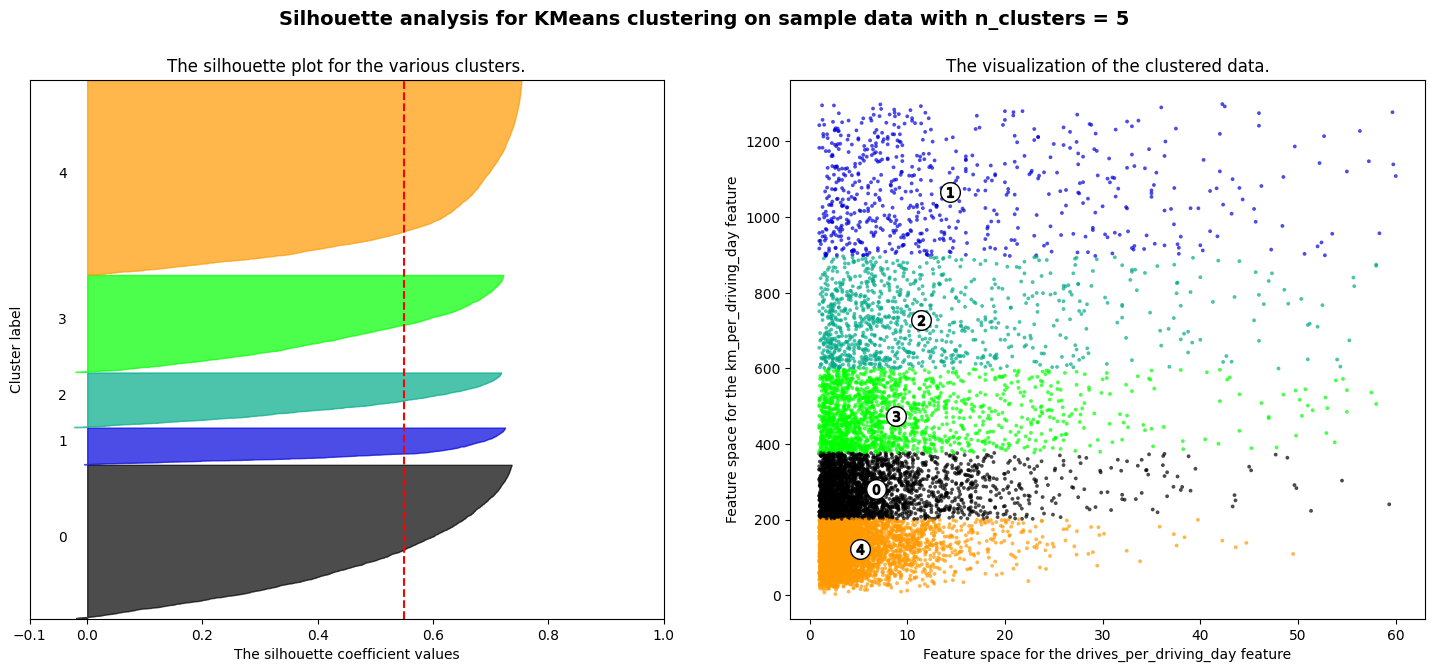

In [69]:
plot_cluster_data_two_features(df1[[col1, col2]], col1, col2, n_clusters)

## drives_per_driving_day VS km_per_drive
такая же гипотеза, думала, мб тут точнее, так как берем km_per_drive за поездку, но не за день

In [71]:
col1 = "drives_per_driving_day"
col2 = "km_per_drive"

### all data

ну вот тут на двух кластерах хороший скор, но, по-моему, кластеры невнятные: кластер 1 получается мало поездок по до 500 км за поездку, и в том же кластере по 300 коротких поездок -- вряд ли это одни и те же люди?

судя по правому графику, тупо почти режет по оси y :((((

For n_clusters = 2 The average silhouette_score is : 0.8582118427230195
For n_clusters = 3 The average silhouette_score is : 0.788060467943749
For n_clusters = 4 The average silhouette_score is : 0.6976314012455487
For n_clusters = 5 The average silhouette_score is : 0.6046198081358358


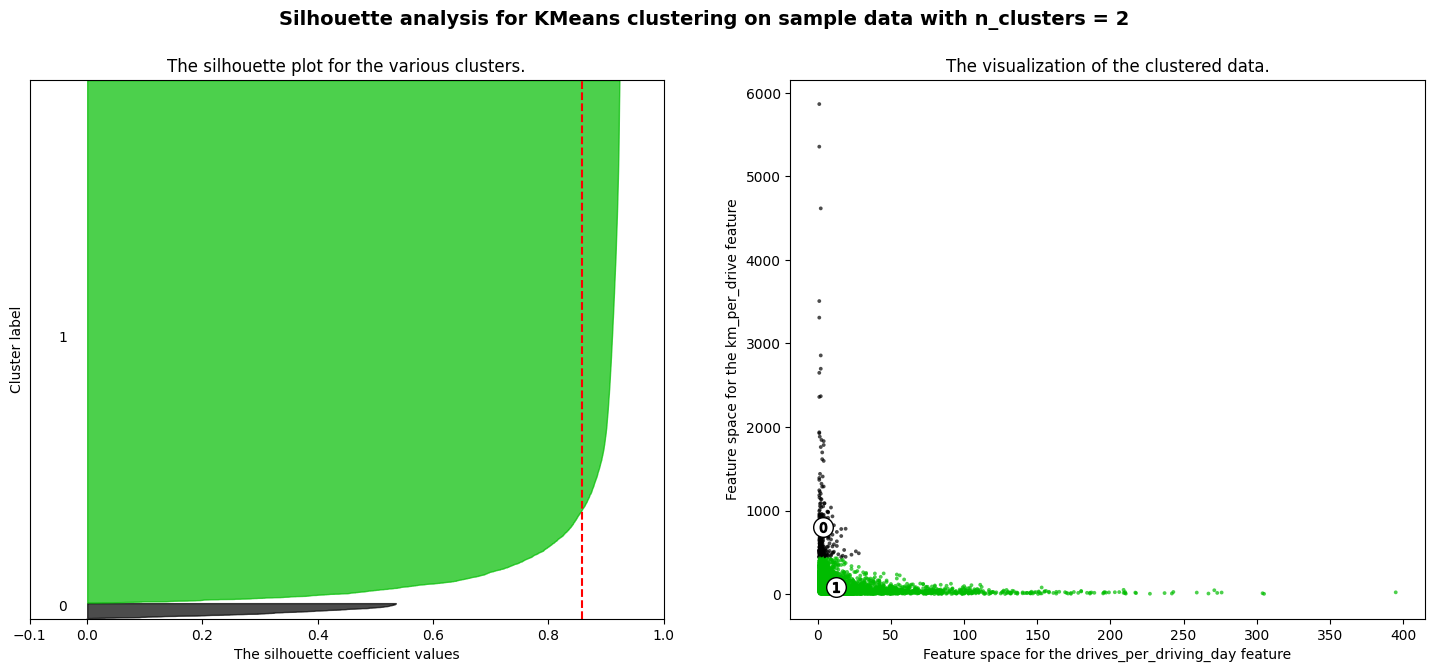

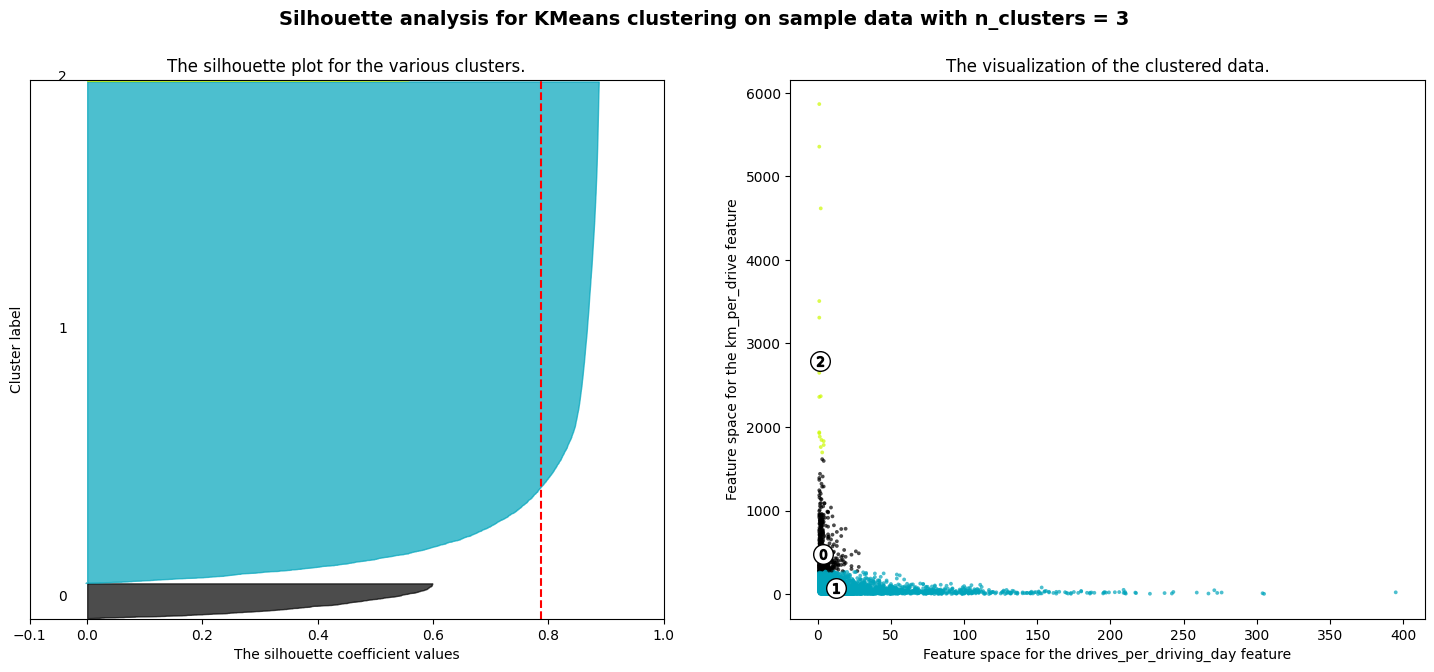

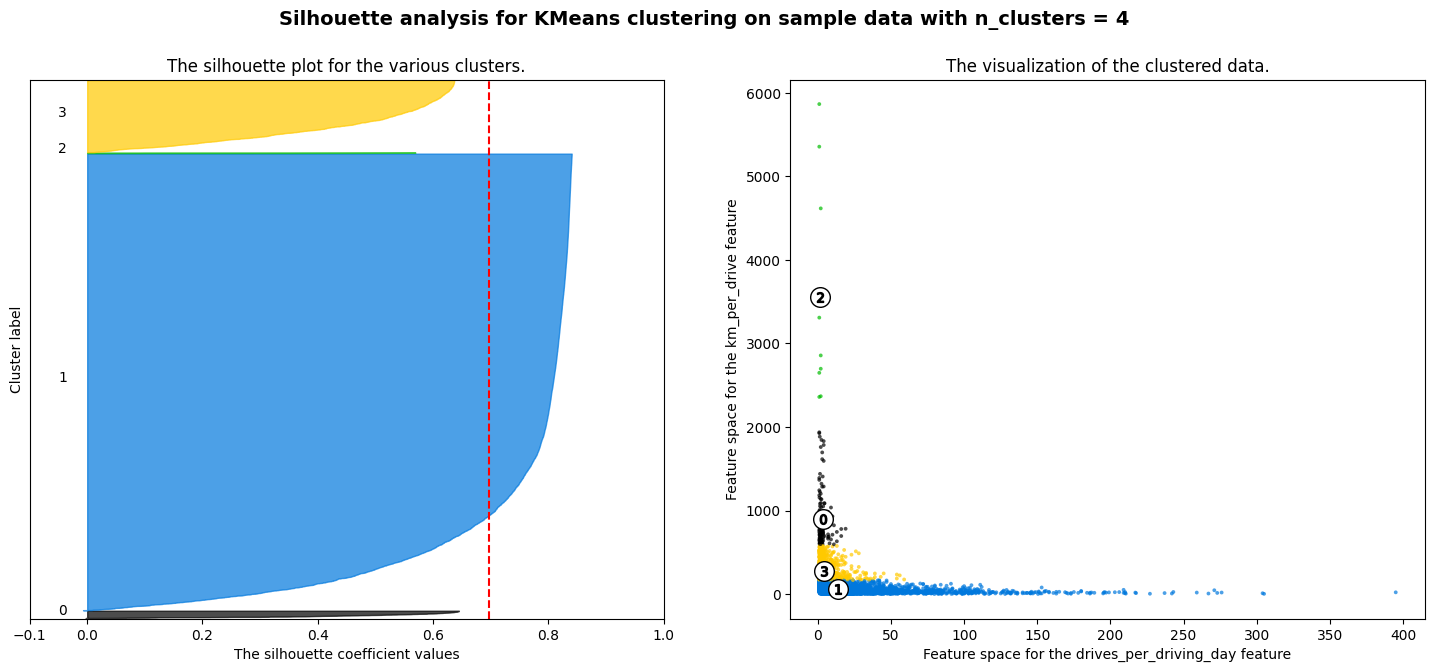

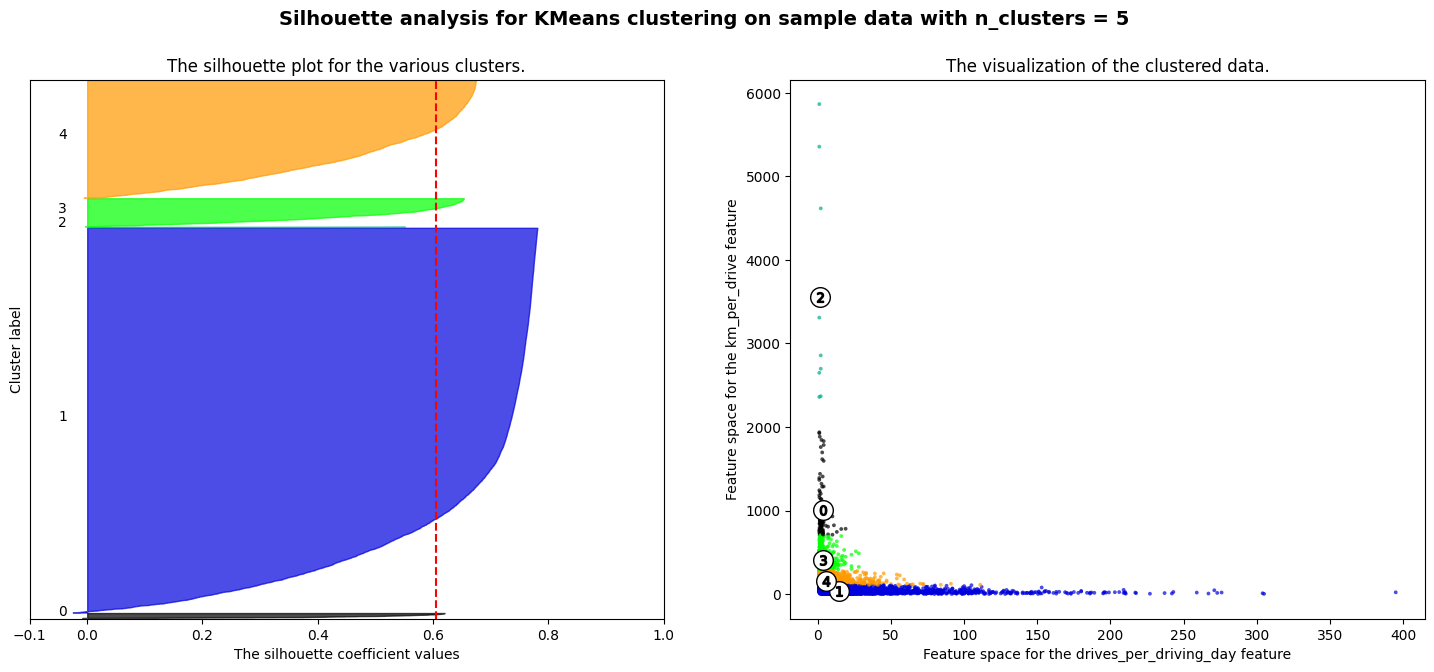

In [72]:
plot_cluster_data_two_features(df[[col1, col2]], col1, col2, n_clusters)

## cut data
в общем, та же ситуация , что и на необрезанных данных

For n_clusters = 2 The average silhouette_score is : 0.7392388283329299
For n_clusters = 3 The average silhouette_score is : 0.6473194652399505
For n_clusters = 4 The average silhouette_score is : 0.6024251153960287
For n_clusters = 5 The average silhouette_score is : 0.5685599759703203


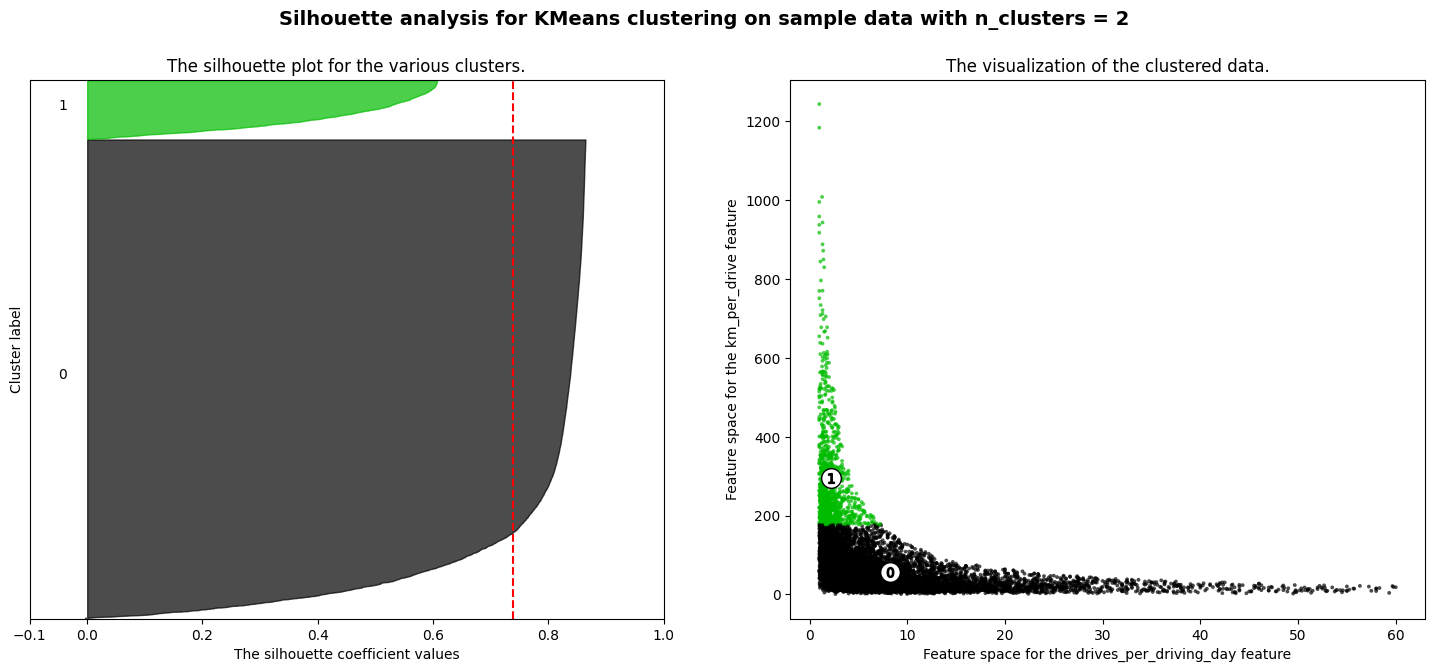

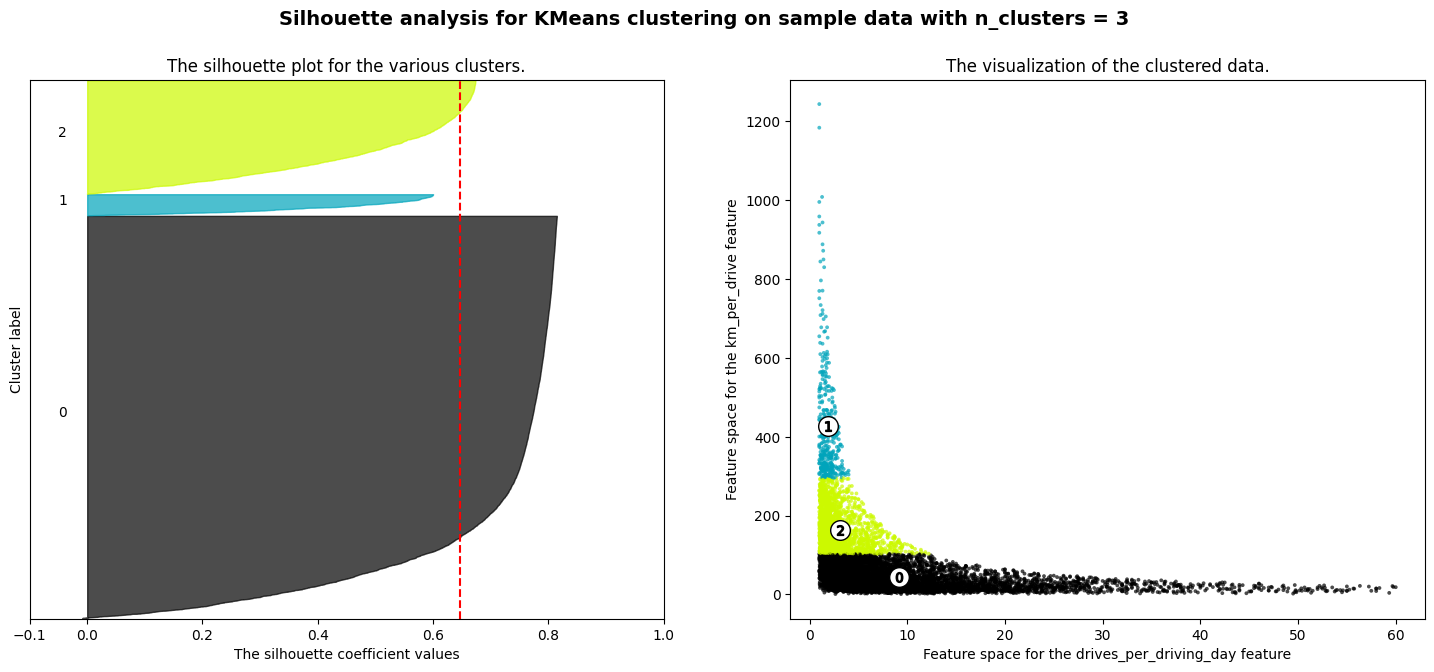

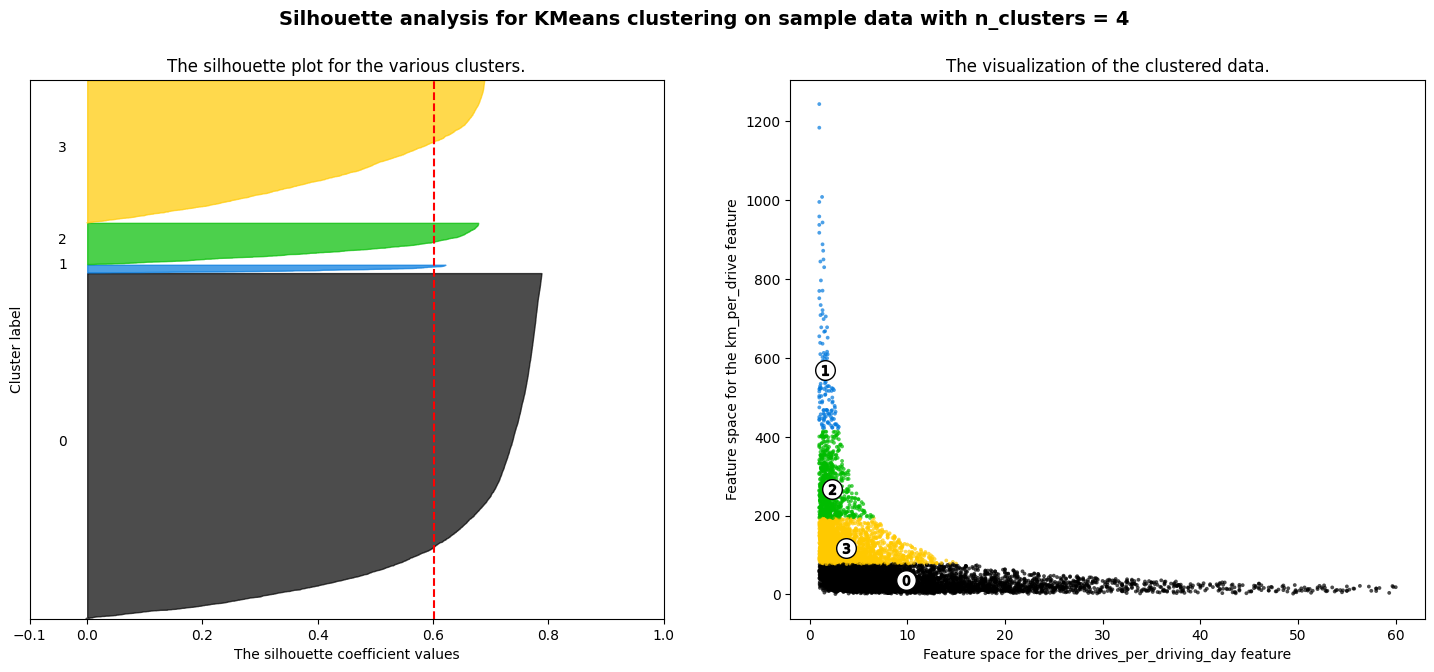

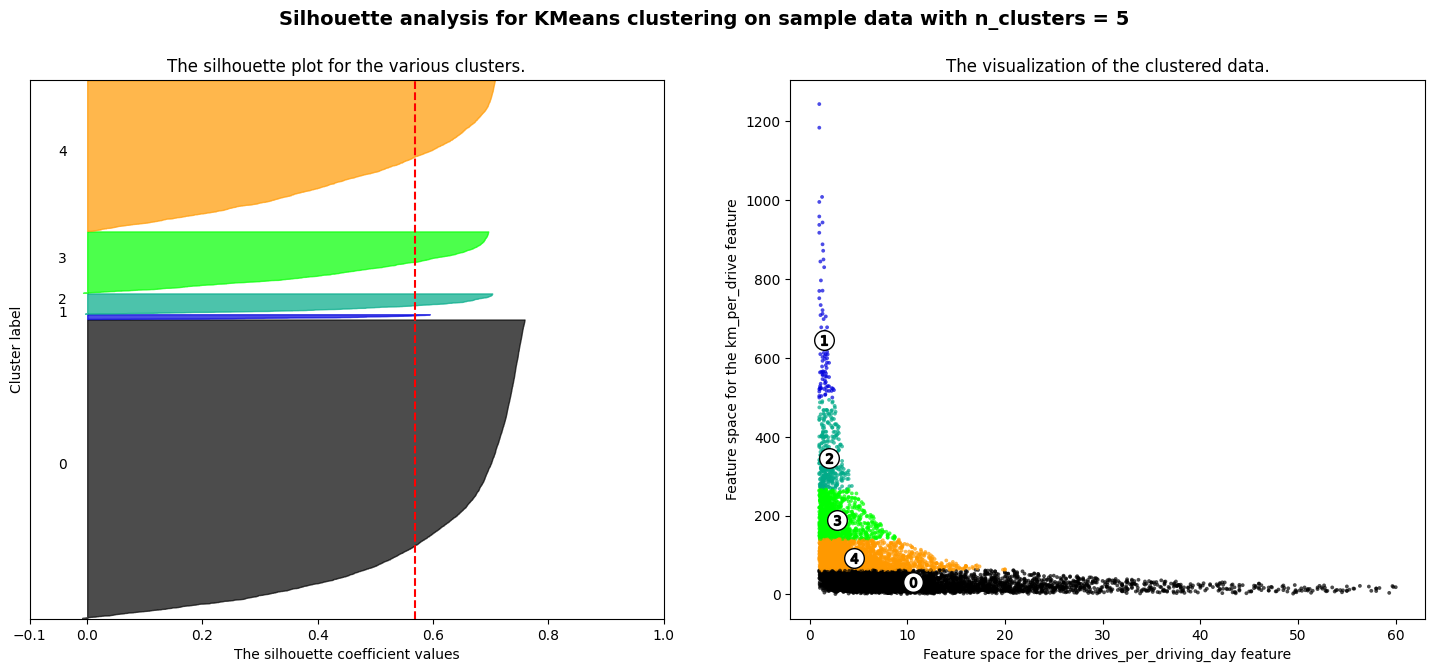

In [74]:
plot_cluster_data_two_features(df1[[col1, col2]], col1, col2, n_clusters)